2024-03-26 13:43:41.468020: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using cache found in /Users/macbookair/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-27 Python-3.11.5 torch-2.1.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.



Time taken to get 3D keypoints = 0.9678080081939697
People recognized:
1


Using matplotlib backend: <object object at 0x11310ac00>


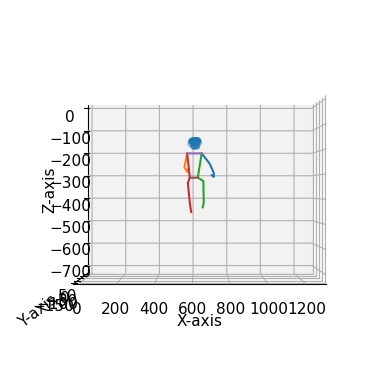

ID: 0
310.4402586221695
NOW 0.10010000000000001

Time taken to get 3D keypoints = 0.800541877746582
People recognized:
1


Using matplotlib backend: MacOSX


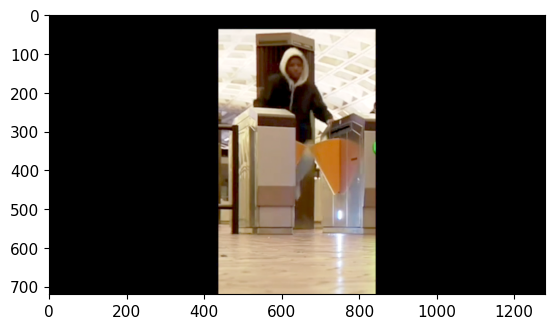

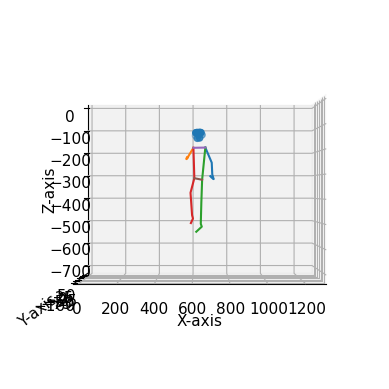

ID: 0
NEW
316.3616621494293
(310.4402586221695, 0.10010000000000001)
COMPUTED SPEED
59.15488039220605

Time taken to get 3D keypoints = 0.908531904220581
People recognized:
1


Using matplotlib backend: MacOSX


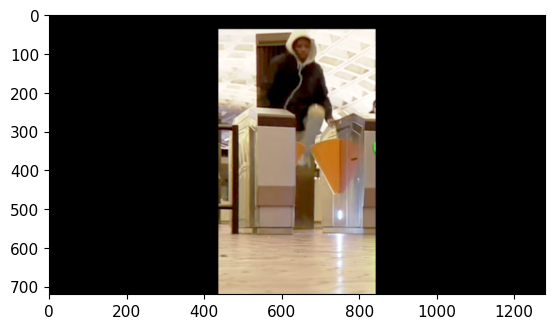

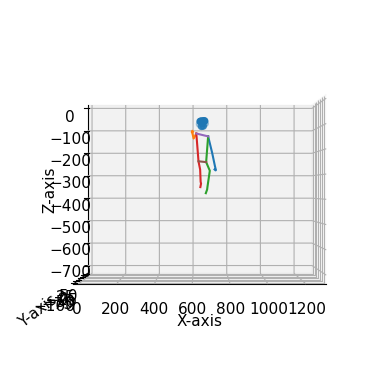

ID: 0
NEW
242.0344533920288
(316.3616621494293, 0.20020000000000002)
COMPUTED SPEED
-742.5295580159892
NOW 0.3003
POSSIBLE CLIMB OVER TURNSTILE DETECTED!

Time taken to get 3D keypoints = 0.7331240177154541
People recognized:
1


Using matplotlib backend: MacOSX


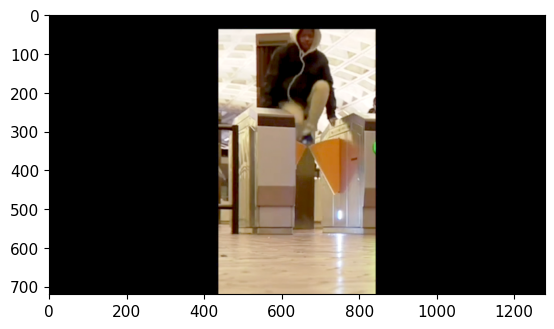

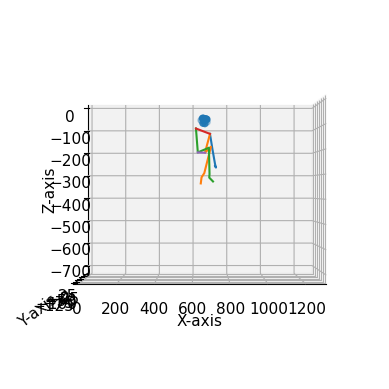

ID: 0
NEW
201.30534303188324
(242.0344533920288, 0.3003)
COMPUTED SPEED
-406.8842193820735
JUMP PREVIOSLY DETECTED
TIME AFTER THE JUMP!!!! 0.10010000000000002
Left distance: 110.08445298671722
Right distance: 110.08445298671722

Time taken to get 3D keypoints = 0.7553658485412598
People recognized:
1


Using matplotlib backend: MacOSX


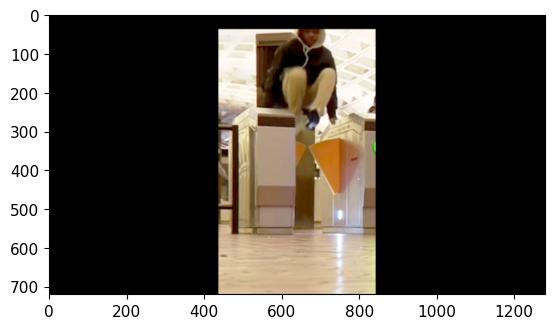

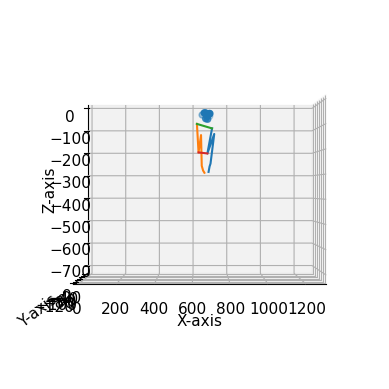

ID: 0
NEW
200.4922171831131
(201.30534303188324, 0.40040000000000003)
COMPUTED SPEED
-8.123135352349065
JUMP PREVIOSLY DETECTED
TIME AFTER THE JUMP!!!! 0.20020000000000004
Left distance: 64.10108435153961
Right distance: 64.10108435153961
CLIMB OVER TURNSTILE DETECTED!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Time taken to get 3D keypoints = 0.9194679260253906
People recognized:
1


Using matplotlib backend: MacOSX


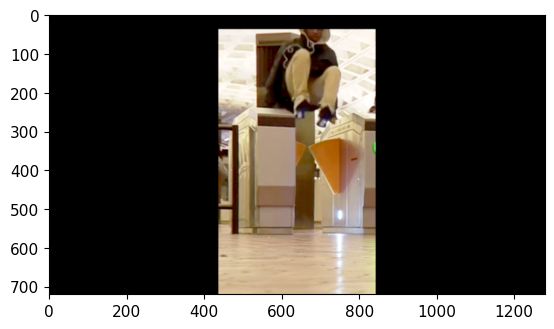

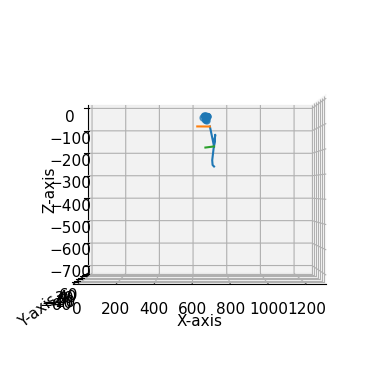

ID: 0
NEW
181.12708234786987
(200.4922171831131, 0.5005000000000001)
COMPUTED SPEED
-193.45789046197035

Time taken to get 3D keypoints = 1.0396883487701416
People recognized:
1


Using matplotlib backend: MacOSX


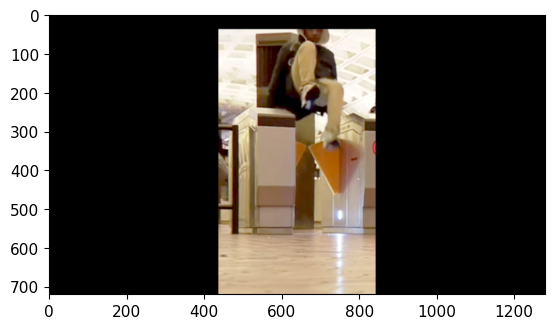

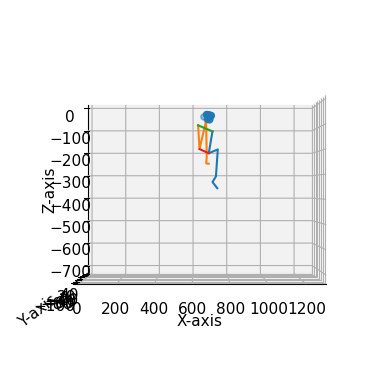

ID: 0
NEW
195.9181815981865
(181.12708234786987, 0.6006)
COMPUTED SPEED
147.76322927389236

Time taken to get 3D keypoints = 0.8280057907104492
People recognized:
1


Using matplotlib backend: MacOSX


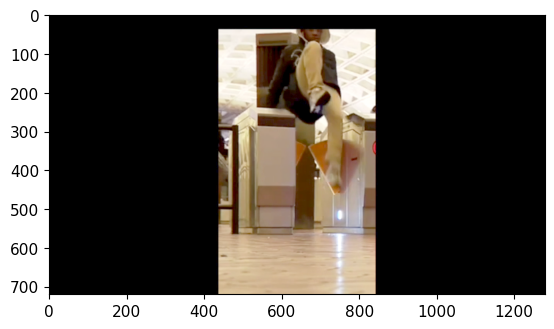

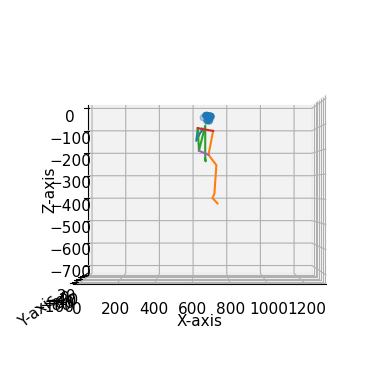

ID: 0
NEW
202.60744461417198
(195.9181815981865, 0.7007)
COMPUTED SPEED
66.82580435549934

Time taken to get 3D keypoints = 0.9920148849487305
People recognized:
1


Using matplotlib backend: MacOSX


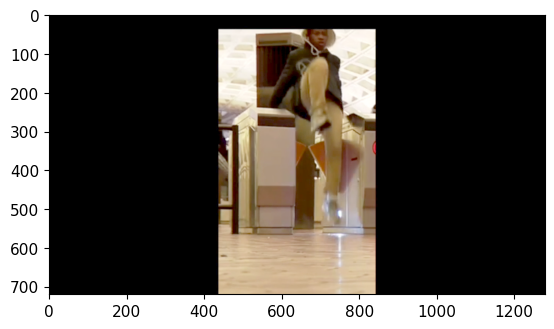

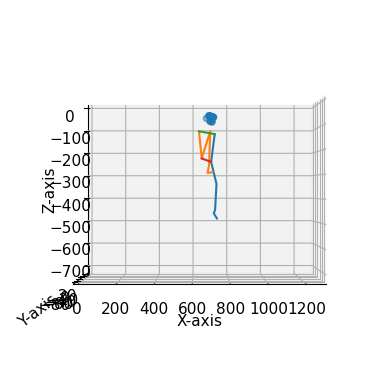

ID: 0
NEW
234.58353903889656
(202.60744461417198, 0.8008000000000001)
COMPUTED SPEED
319.4415027445014

Time taken to get 3D keypoints = 0.8019387722015381
People recognized:
1


Using matplotlib backend: MacOSX


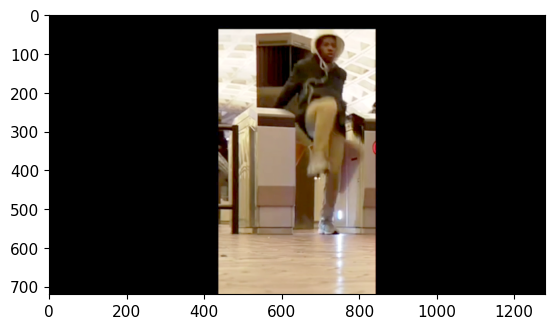

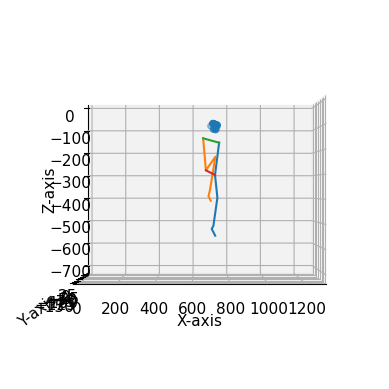

ID: 0
NEW
288.03843688964844
(234.58353903889656, 0.9009)
COMPUTED SPEED
534.0149635439744

Time taken to get 3D keypoints = 0.8139801025390625
People recognized:
1


Using matplotlib backend: MacOSX


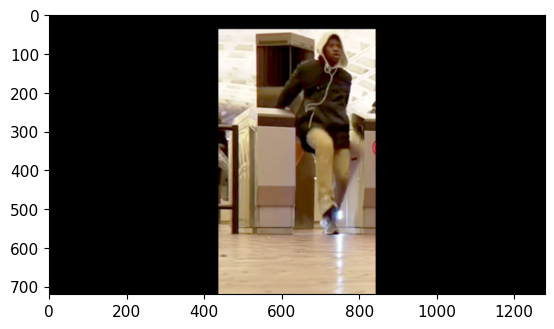

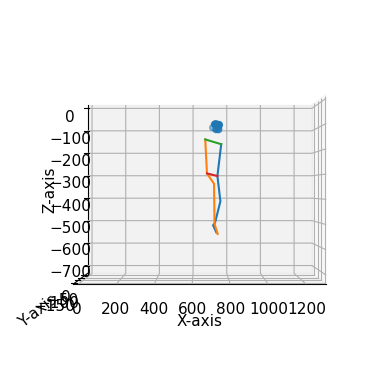

ID: 0
NEW
296.80902306735516
(288.03843688964844, 1.0010000000000001)
COMPUTED SPEED
87.61824353353377

Time taken to get 3D keypoints = 0.7816240787506104
People recognized:
1


Using matplotlib backend: MacOSX


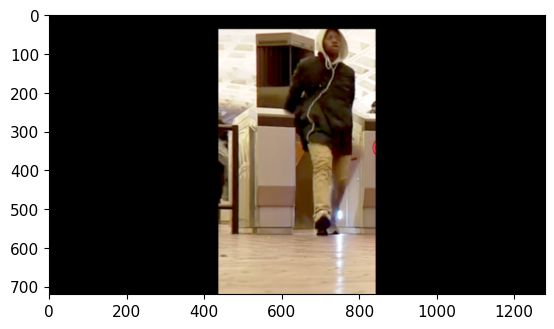

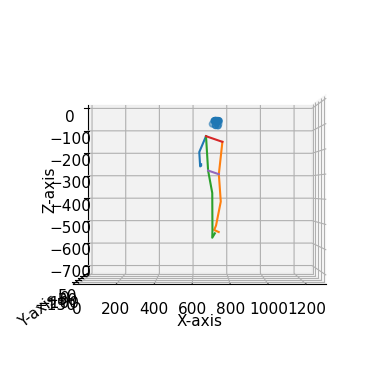

ID: 0
NEW
287.3084146976471
(296.80902306735516, 1.1011)
COMPUTED SPEED
-94.91117252455598

Time taken to get 3D keypoints = 0.8265440464019775
People recognized:
1


Using matplotlib backend: MacOSX


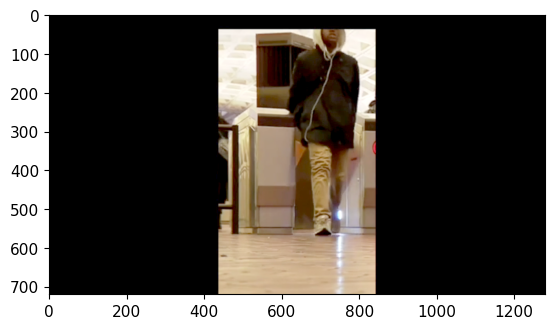

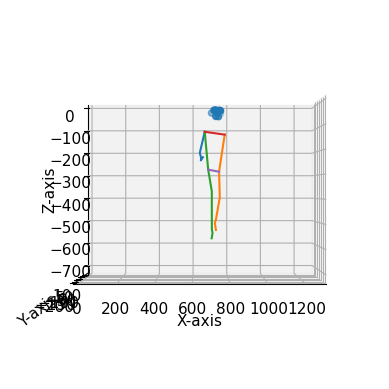

ID: 0
NEW
281.24735233187675
(287.3084146976471, 1.2012)
COMPUTED SPEED
-60.55007358411923

Time taken to get 3D keypoints = 0.9947540760040283
People recognized:
1


Using matplotlib backend: MacOSX


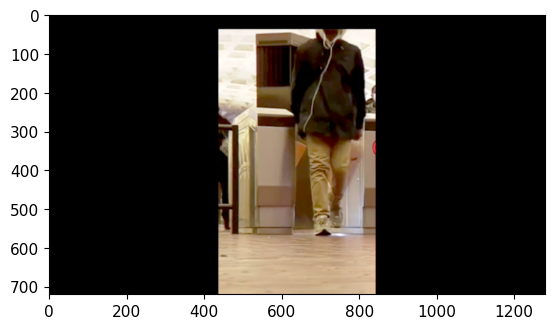

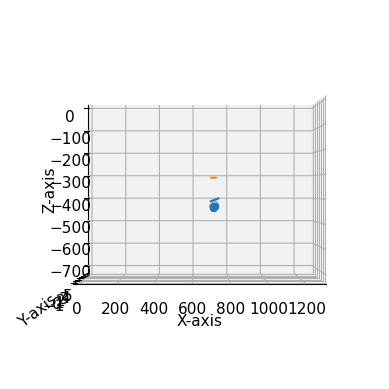

ID: 0
NEW
313.21868908405304
(281.24735233187675, 1.3013000000000001)
COMPUTED SPEED
319.3939735482151


In [ ]:
import cv2 
import mediapipe as mp
import torch
import time
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import arccos, array
from numpy.linalg import norm


def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)






# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.4)

count = 0
center_points_prev_frame = []

tracking_objects = {}
track_id = 0


person_tracking_temporal_features={}

climbed_over_turnstile={}
                



cap = cv2.VideoCapture('climb_over_turnstile-subway_2.mp4')


fps = cap.get(cv2.CAP_PROP_FPS)
skip=int(fps /8)
nFrame=0




    
while cv2.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv2.waitKey()
        break
        
    if nFrame % skip == 0:


        frameWidth = frame.shape[1]
        frameHeight = frame.shape[0]

        frame = gammaCorrection(frame, 1.8)

        count += 1




        if cv2.waitKey(1) & 0xFF == ord('q'):
            break



        try:


             frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)



             t=time.time()


             results = model(frame_rgb)
             # Results
             df=results.pandas().xyxy[0]
             rslt_df = df[df['name'] == 'person']
             rslt_df = rslt_df[rslt_df['confidence'] >= 0.4]




             rslt_df=rslt_df.filter(items=['xmin', 'ymin','xmax','ymax'])

             l=rslt_df.values.tolist()


             landmark_point_people = []

             center_points_cur_frame = []


             for x in l:

                 [xmin, ymin,xmax,ymax] = x

                 cx = int((xmin + xmin + xmax) / 2)
                 cy = int((ymin + ymin + ymax) / 2)
                 center_points_cur_frame.append((cx, cy, xmin, ymin, xmax, ymax))


                 cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax)-1, int(ymax)-1), (0, 255, 0), 2)








             if count <= 2:
                 for pt in center_points_cur_frame:
                     for pt2 in center_points_prev_frame:
                        distance = math.hypot(pt2[0] - pt[0], pt2[1] - pt[1])


                        if distance < 500:
                           tracking_objects[track_id] = pt
                           track_id += 1



             else:

                tracking_objects_copy = tracking_objects.copy()
                center_points_cur_frame_copy = center_points_cur_frame.copy()

                for object_id, pt2 in tracking_objects_copy.items():
                    object_exists = False
                    for pt in center_points_cur_frame_copy:
                        distance = math.hypot(pt2[0] - pt[0], pt2[1] - pt[1])


                        # Update IDs position
                        if distance < 100:
                            tracking_objects[object_id] = pt
                            object_exists = True
                            if pt in center_points_cur_frame:
                                center_points_cur_frame.remove(pt)
                            continue

                    # Remove IDs lost
                    #if not object_exists:
                    #   tracking_objects.pop(object_id)

                # Add new IDs found
                for pt in center_points_cur_frame:
                    tracking_objects[track_id] = pt
                    track_id += 1




             for object_id, pt in tracking_objects.items():
                #cv2.circle(frame, (pt[0]-1, pt[1]-1), 5, (0, 0, 255), -1)
                cv2.putText(frame, str(object_id), (int(pt[2]),int(pt[3])), 0, 1, (0, 0, 255), 2)
                [xmin, ymin,xmax,ymax] = [pt[2],pt[3],pt[4],pt[5]]




                frame_rgb_out = frame_rgb[int(ymin):int(ymax)-1,int(xmin):int(xmax)-1]
                pose_results = pose.process(frame_rgb_out)


                landmark_point = []


                if pose_results.pose_landmarks is not None:
                    for g in range(33):
                        landmark_point.append([pose_results.pose_landmarks.landmark[g].visibility, (pose_results.pose_landmarks.landmark[g].x*(int(xmax)-1-int(xmin))+int(xmin) , pose_results.pose_landmarks.landmark[g].y*(int(ymax)-1-int(ymin))+int(ymin) , pose_results.pose_landmarks.landmark[g].z*((int(xmax)-1-int(xmin))/3)) ])




                    dic={}
                    dic.update({"id" :object_id})
                    dic.update({"points":landmark_point})



                    landmark_point_people.append(dic)












             center_points_prev_frame = center_points_cur_frame.copy()    


             cv2.imshow("People indefinication", frame)



             cv2.waitKey(200)


             if landmark_point_people:

                print("")
                print("Time taken to get 3D keypoints = {}".format(time.time() - t))
                print("People recognized:")
                print(len(landmark_point_people))
                print("")
                print("")
                #print(landmark_point_people)

                cv2.waitKey(100)

                plt.imshow(frame_rgb)





                from mpl_toolkits import mplot3d
                %matplotlib 
                import numpy as np
                import matplotlib.pyplot as plt
                fig = plt.figure()
                ax = plt.axes(projection='3d')

                ax.set_xlabel('X-axis')
                ax.set_ylabel('Y-axis')
                ax.set_zlabel('Z-axis')








                ax.set_xlim3d(0, frame.shape[1])
                ax.set_zlim3d(-frame.shape[0], 0)

                ax.view_init(elev=0, azim=-90, roll=0)







                face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                right_arm_index_list = [11, 13, 15, 17, 19, 21]
                left_arm_index_list = [12, 14, 16, 18, 20, 22]
                right_body_side_index_list = [11, 23, 25, 27, 29, 31]
                left_body_side_index_list = [12, 24, 26, 28, 30, 32]
                shoulder_index_list = [11, 12]
                waist_index_list = [23, 24]






                for landmark_points in landmark_point_people:  

                   landmark_point=landmark_points['points'] 


                   face_x, face_y, face_z = [], [], []
                   for index in face_index_list:
                      if landmark_point[index][0]> 0.1:
                          point = landmark_point[index][1]
                          face_x.append(point[0])
                          face_y.append(point[2])
                          face_z.append(point[1] * (-1))


                   plot_right_arm= True;

                   right_arm_x, right_arm_y, right_arm_z = [], [], []
                   for index in right_arm_index_list:

                      if landmark_point[index][0]<0.10:
                            plot_right_arm= False;

                      point = landmark_point[index][1]
                      right_arm_x.append(point[0])
                      right_arm_y.append(point[2])
                      right_arm_z.append(point[1] * (-1))

                   plot_left_arm= True;

                   left_arm_x, left_arm_y, left_arm_z = [], [], []
                   for index in left_arm_index_list:

                      if landmark_point[index][0]<0.10:
                            plot_left_arm= False;

                      point = landmark_point[index][1]
                      left_arm_x.append(point[0])
                      left_arm_y.append(point[2])
                      left_arm_z.append(point[1] * (-1))


                   plot_right_body_side= True;
                   right_body_side_x, right_body_side_y, right_body_side_z = [], [], []
                   for index in right_body_side_index_list:
                      if landmark_point[index][0]<0.10:
                            plot_right_body_side= False;                  


                      point = landmark_point[index][1]
                      right_body_side_x.append(point[0])
                      right_body_side_y.append(point[2])
                      right_body_side_z.append(point[1] * (-1))

                   plot_left_body_side= True;
                   left_body_side_x, left_body_side_y, left_body_side_z = [], [], []
                   for index in left_body_side_index_list:
                      if landmark_point[index][0]<0.10:
                            plot_left_body_side= False;

                      point = landmark_point[index][1]
                      left_body_side_x.append(point[0])
                      left_body_side_y.append(point[2])
                      left_body_side_z.append(point[1] * (-1))


                   plot_shoulder= True;
                   shoulder_x, shoulder_y, shoulder_z = [], [], []
                   for index in shoulder_index_list:
                      if landmark_point[index][0]<0.10:
                            plot_shoulder= False;
                      point = landmark_point[index][1]
                      shoulder_x.append(point[0])
                      shoulder_y.append(point[2])
                      shoulder_z.append(point[1] * (-1))


                   plot_waist= True;
                   waist_x, waist_y, waist_z = [], [], []
                   for index in waist_index_list:
                      if landmark_point[index][0]<0.10:
                            plot_waist= False;
                      point = landmark_point[index][1]
                      waist_x.append(point[0])
                      waist_y.append(point[2])
                      waist_z.append(point[1] * (-1))



                   ax.scatter(face_x, face_y, face_z)

                   if plot_right_arm:
                       ax.plot(right_arm_x, right_arm_y, right_arm_z)

                   if plot_left_arm:
                       ax.plot(left_arm_x, left_arm_y, left_arm_z)

                   if plot_right_body_side:
                       ax.plot(right_body_side_x, right_body_side_y, right_body_side_z)

                   if plot_left_body_side:
                       ax.plot(left_body_side_x, left_body_side_y, left_body_side_z)

                   if plot_shoulder:
                       ax.plot(shoulder_x, shoulder_y, shoulder_z)

                   if plot_waist: 
                       ax.plot(waist_x, waist_y, waist_z)





                #plt.show()

                cv2.waitKey(500)



                %matplotlib inline
                plt.show()

                keypoints_pairs_2D_3D = []




                th=0.10;



                i=0;



                for landmark_points in landmark_point_people:  

                   landmark_point=landmark_points['points']
                   id_person=landmark_points['id']
                   keypoints_pairs_2D_3D.append({}) 



                   dic=keypoints_pairs_2D_3D[i];
                   dic["id"]={}
                   dic["id"].update({"3D" : str(id_person)})
                   keypoints_pairs_2D_3D[i]=dic; 




                   if landmark_point[0][0] and landmark_point[0][0] > th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["Nose"]={}
                      dic["Nose"].update({"3D" : (landmark_point[0][1][0], landmark_point[0][1][1], landmark_point[0][1][2], landmark_point[0][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["Nose"]={}
                      keypoints_pairs_2D_3D[i]=dic;              

                   if landmark_point[12][0] and landmark_point[12][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Sho"]={}
                      dic["R-Sho"].update({"3D" : (landmark_point[12][1][0], landmark_point[12][1][1], landmark_point[12][1][2], landmark_point[12][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Sho"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[14][0] and landmark_point[14][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Elb"]={}
                      dic["R-Elb"].update({"3D" : (landmark_point[14][1][0], landmark_point[14][1][1], landmark_point[14][1][2], landmark_point[14][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Elb"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[16][0] and landmark_point[16][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Wr"]={}
                      dic["R-Wr"].update({"3D" : (landmark_point[16][1][0], landmark_point[16][1][1], landmark_point[16][1][2], landmark_point[16][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Wr"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[11][0] and landmark_point[11][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Sho"]={}
                      dic["L-Sho"].update({"3D" : (landmark_point[11][1][0], landmark_point[11][1][1], landmark_point[11][1][2], landmark_point[11][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Sho"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[13][0] and landmark_point[13][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Elb"]={}
                      dic["L-Elb"].update({"3D" : (landmark_point[13][1][0], landmark_point[13][1][1], landmark_point[13][1][2], landmark_point[13][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Elb"]={}
                      keypoints_pairs_2D_3D[i]=dic;




                   if landmark_point[15][0] and landmark_point[15][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Wr"]={}
                      dic["L-Wr"].update({"3D" : (landmark_point[15][1][0], landmark_point[15][1][1], landmark_point[15][1][2], landmark_point[15][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Wr"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[24][0] and landmark_point[24][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Hip"]={}
                      dic["R-Hip"].update({"3D" : (landmark_point[24][1][0], landmark_point[24][1][1], landmark_point[24][1][2], landmark_point[24][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Hip"]={}
                      keypoints_pairs_2D_3D[i]=dic;




                   if landmark_point[26][0] and landmark_point[26][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Knee"]={}
                      dic["R-Knee"].update({"3D" : (landmark_point[26][1][0], landmark_point[26][1][1], landmark_point[26][1][2], landmark_point[26][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Knee"]={}
                      keypoints_pairs_2D_3D[i]=dic;



                   if landmark_point[28][0] and landmark_point[28][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Ank"]={}
                      dic["R-Ank"].update({"3D" : (landmark_point[28][1][0], landmark_point[28][1][1], landmark_point[28][1][2], landmark_point[28][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Ank"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[23][0] and landmark_point[23][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Hip"]={}
                      dic["L-Hip"].update({"3D" : (landmark_point[23][1][0], landmark_point[23][1][1], landmark_point[23][1][2], landmark_point[23][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Hip"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[25][0] and landmark_point[25][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Knee"]={}
                      dic["L-Knee"].update({"3D" : (landmark_point[25][1][0], landmark_point[25][1][1], landmark_point[25][1][2], landmark_point[25][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Knee"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[27][0] and landmark_point[27][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Ank"]={}
                      dic["L-Ank"].update({"3D" : (landmark_point[27][1][0], landmark_point[27][1][1], landmark_point[27][1][2], landmark_point[27][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Ank"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[5][0] and landmark_point[5][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Eye"]={}
                      dic["R-Eye"].update({"3D" : (landmark_point[5][1][0], landmark_point[5][1][1], landmark_point[5][1][2], landmark_point[5][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Eye"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[2][0] and landmark_point[2][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Eye"]={}
                      dic["L-Eye"].update({"3D" : (landmark_point[2][1][0], landmark_point[2][1][1], landmark_point[2][1][2], landmark_point[2][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Eye"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[8][0] and landmark_point[8][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Ear"]={}
                      dic["R-Ear"].update({"3D" : (landmark_point[8][1][0], landmark_point[8][1][1], landmark_point[8][1][2], landmark_point[8][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Ear"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[7][0] and landmark_point[7][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Ear"]={}
                      dic["L-Ear"].update({"3D" : (landmark_point[7][1][0], landmark_point[7][1][1], landmark_point[7][1][2], landmark_point[7][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Ear"]={}
                      keypoints_pairs_2D_3D[i]=dic;




                   if landmark_point[1][0] and landmark_point[1][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Eye-Inner"]={}
                      dic["L-Eye-Inner"].update({"3D" : (landmark_point[1][1][0], landmark_point[1][1][1], landmark_point[1][1][2], landmark_point[1][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["L-Eye-Inner"]={}
                      keypoints_pairs_2D_3D[i]=dic;

                   if landmark_point[3][0] and landmark_point[3][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Eye-Outer"]={}
                      dic["L-Eye-Outer"].update({"3D" : (landmark_point[3][1][0], landmark_point[3][1][1], landmark_point[3][1][2], landmark_point[3][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["L-Eye-Outer"]={}
                      keypoints_pairs_2D_3D[i]=dic;



                   if landmark_point[4][0] and landmark_point[4][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Eye-Inner"]={}
                      dic["R-Eye-Inner"].update({"3D" : (landmark_point[4][1][0], landmark_point[4][1][1], landmark_point[4][1][2], landmark_point[4][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["R-Eye-Inner"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[6][0] and landmark_point[6][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Eye-Outer"]={}
                      dic["R-Eye-Outer"].update({"3D" : (landmark_point[6][1][0], landmark_point[6][1][1], landmark_point[6][1][2], landmark_point[6][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["R-Eye-Outer"]={}
                      keypoints_pairs_2D_3D[i]=dic;



                   if landmark_point[9][0] and landmark_point[9][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Mouth"]={}
                      dic["L-Mouth"].update({"3D" : (landmark_point[9][1][0], landmark_point[9][1][1], landmark_point[9][1][2], landmark_point[9][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["L-Mouth"]={}
                      keypoints_pairs_2D_3D[i]=dic;



                   if landmark_point[10][0] and landmark_point[10][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Mouth"]={}
                      dic["R-Mouth"].update({"3D" : (landmark_point[10][1][0], landmark_point[10][1][1], landmark_point[10][1][2], landmark_point[10][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["R-Mouth"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[17][0] and landmark_point[17][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Pinky"]={}
                      dic["L-Pinky"].update({"3D" : (landmark_point[17][1][0], landmark_point[17][1][1], landmark_point[17][1][2], landmark_point[17][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["L-Pinky"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[18][0] and landmark_point[18][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Pinky"]={}
                      dic["R-Pinky"].update({"3D" : (landmark_point[18][1][0], landmark_point[18][1][1], landmark_point[18][1][2], landmark_point[18][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["R-Pinky"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[19][0] and landmark_point[19][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Index"]={}
                      dic["L-Index"].update({"3D" : (landmark_point[19][1][0], landmark_point[19][1][1], landmark_point[19][1][2], landmark_point[19][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["L-Index"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[20][0] and landmark_point[20][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Index"]={}
                      dic["R-Index"].update({"3D" : (landmark_point[20][1][0], landmark_point[20][1][1], landmark_point[20][1][2], landmark_point[20][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["R-Index"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[21][0] and landmark_point[21][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Thumb"]={}
                      dic["L-Thumb"].update({"3D" : (landmark_point[21][1][0], landmark_point[21][1][1], landmark_point[21][1][2], landmark_point[21][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["L-Thumb"]={}
                      keypoints_pairs_2D_3D[i]=dic;

                   if landmark_point[22][0] and landmark_point[22][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Thumb"]={}
                      dic["R-Thumb"].update({"3D" : (landmark_point[22][1][0], landmark_point[22][1][1], landmark_point[22][1][2], landmark_point[22][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["R-Thumb"]={}
                      keypoints_pairs_2D_3D[i]=dic;

                   if landmark_point[29][0] and landmark_point[29][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Heel"]={}
                      dic["L-Heel"].update({"3D" : (landmark_point[29][1][0], landmark_point[29][1][1], landmark_point[29][1][2], landmark_point[29][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["L-Heel"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[30][0] and landmark_point[30][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Heel"]={}
                      dic["R-Heel"].update({"3D" : (landmark_point[30][1][0], landmark_point[30][1][1], landmark_point[30][1][2], landmark_point[30][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["R-Heel"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[31][0] and landmark_point[31][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["L-Foot-Index"]={}
                      dic["L-Foot-Index"].update({"3D" : (landmark_point[31][1][0], landmark_point[31][1][1], landmark_point[31][1][2], landmark_point[31][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["L-Foot-Index"]={}
                      keypoints_pairs_2D_3D[i]=dic;


                   if landmark_point[32][0] and landmark_point[32][0]> th:
                      dic=keypoints_pairs_2D_3D[i];
                      dic["R-Foot-Index"]={}
                      dic["R-Foot-Index"].update({"3D" : (landmark_point[32][1][0], landmark_point[32][1][1], landmark_point[32][1][2], landmark_point[32][0])})
                      keypoints_pairs_2D_3D[i]=dic;                        
                   else:
                      dic=keypoints_pairs_2D_3D[i];        
                      dic["R-Foot-Index"]={}
                      keypoints_pairs_2D_3D[i]=dic;



                   i=i+1;





                for i in range(len(landmark_point_people)):


                    if 'id' in keypoints_pairs_2D_3D[i].keys():
                        print("ID:",keypoints_pairs_2D_3D[i]['id']['3D'])

                       



                        if keypoints_pairs_2D_3D[i]['id']['3D'] in person_tracking_temporal_features.keys():                     



                            old=person_tracking_temporal_features[keypoints_pairs_2D_3D[i]['id']['3D']]

                            if keypoints_pairs_2D_3D[i]["R-Hip"] and keypoints_pairs_2D_3D[i]["L-Hip"]:


                                A=keypoints_pairs_2D_3D[i]["R-Hip"]
                                pA=A['3D']

                                B=keypoints_pairs_2D_3D[i]["L-Hip"]
                                pB=B['3D']


                                centerHips=[(pB[0]+pA[0])/2,(pB[1]+pA[1])/2, (pB[2]+pA[2])/2]

                                print("NEW")

                                print(centerHips[1])

                                print(old)

                                person_tracking_temporal_features.update({ keypoints_pairs_2D_3D[i]['id']['3D']: (float(centerHips[1]), float(nFrame)/fps ) } )   
                                print("COMPUTED SPEED")
                                

                                speed=(float(centerHips[1])-old[0])/((float(nFrame)/fps)-old[1])
                                print(speed)
                                
                                
                                if keypoints_pairs_2D_3D[i]['id']['3D'] in climbed_over_turnstile.keys():
                                    print("JUMP PREVIOSLY DETECTED")
                                    time_jump=(float(nFrame)/fps)-climbed_over_turnstile[keypoints_pairs_2D_3D[i]['id']['3D']]
                                    print("TIME AFTER THE JUMP!!!!",time_jump)
                                    
                                    if time_jump > 0.5:
                                        climbed_over_turnstile.pop(keypoints_pairs_2D_3D[i]['id']['3D'])
                                        print("FALSE ALARM!")
                                    else:
                                        if keypoints_pairs_2D_3D[i]["L-Heel"] and keypoints_pairs_2D_3D[i]["R-Heel"]:
                                            A=keypoints_pairs_2D_3D[i]["L-Heel"]
                                            pA=A['3D']
                                            L_Heel=[pA[0],pA[1],pA[2]]
                                            B=keypoints_pairs_2D_3D[i]["R-Heel"]
                                            pB=B['3D']
                                            R_Heel=[pB[0],pB[1],pB[2]]
                                            print("Left distance:",L_Heel[1]-centerHips[1])
                                            print("Right distance:",L_Heel[1]-centerHips[1])
                                            
                                            if speed > - 300 and (L_Heel[1]-centerHips[1])< 200 and (R_Heel[1]-centerHips[1])< 200:
                                                print("CLIMB OVER TURNSTILE DETECTED!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                                                climbed_over_turnstile.pop(keypoints_pairs_2D_3D[i]['id']['3D'])  
                                                text = "CLIMB OVER TURNSTILE DETECTED"
                                                coordinates = (100,100)
                                                font = cv2.FONT_HERSHEY_SIMPLEX
                                                fontScale = 1
                                                color = (255,0,0)
                                                thickness = 2
                                                dangerous_situation = cv2.putText(frame, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
                                                cv2.imshow("climb over turnstile alert", frame)
                                                cv2.waitKey(3000)
                                                cv2.destroyAllWindows()
                                        
                                    
                                    

                                elif speed < -550:
                                    climbed_over_turnstile.update({ keypoints_pairs_2D_3D[i]['id']['3D']: (float(cap.get(cv2.CAP_PROP_POS_MSEC))/1000) } )
                                    print("NOW",float(nFrame)/fps)
                                    print("POSSIBLE CLIMB OVER TURNSTILE DETECTED!")
                                        


                        else:
                            if keypoints_pairs_2D_3D[i]["R-Hip"] and keypoints_pairs_2D_3D[i]["L-Hip"]:


                                A=keypoints_pairs_2D_3D[i]["R-Hip"]
                                pA=A['3D']

                                B=keypoints_pairs_2D_3D[i]["L-Hip"]
                                pB=B['3D']


                                centerHips=[(pB[0]+pA[0])/2,(pB[1]+pA[1])/2, (pB[2]+pA[2])/2]
                                print(centerHips[1])


                                print("NOW",float(nFrame)/fps)
                                
                                person_tracking_temporal_features.update({ keypoints_pairs_2D_3D[i]['id']['3D']: (float(centerHips[1]), float(nFrame)/fps ) } )












                """

                print(" 3D Landmarks----------------------------------------------") 
                for i in range(len(l)):
                    print("")
                    print("Person: ",i)
                    print("")
                    for k in keypoints_pairs_2D_3D[i].keys():
                        print( k)
                        print(keypoints_pairs_2D_3D[i][k])
                        print("------------------------------------------------")



                """              




        except:
             break

        if cv2.waitKey(1) == ord('q'):
              break




    
    nFrame=nFrame+1          
cap.release()
cv2.destroyAllWindows()